## SVM

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_cleaned_v5.csv")

In [31]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [32]:
def removeOutlier(df, col):
    quartis = np.percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = df[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

<Axes: xlabel='price'>

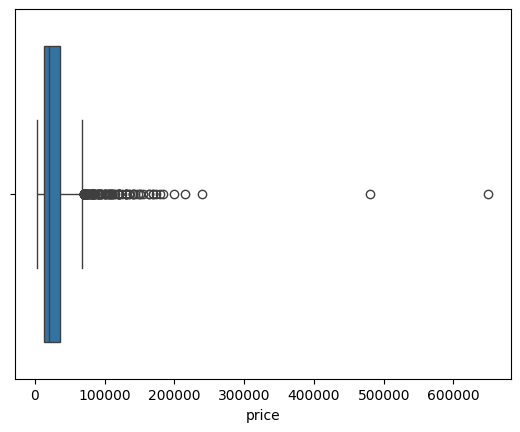

In [33]:
sns.boxplot(x=df['price'])

<Axes: xlabel='price'>

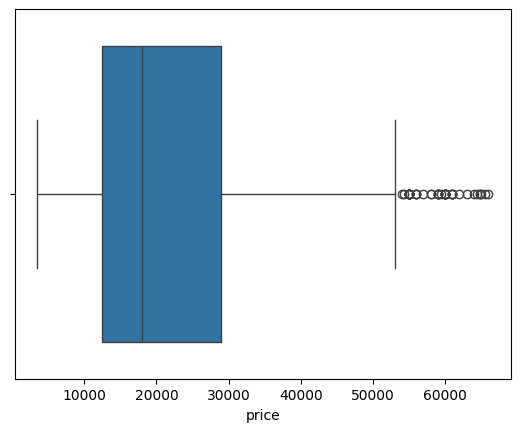

In [34]:
df = removeOutlier(df, 'price')

sns.boxplot(x=df['price'])

In [35]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                        57
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               19
num_cores                      1
processor_speed               25
battery_capacity               7
fast_charging_available        0
fast_charging                175
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              1
os                             3
primary_camera_rear            0
primary_camera_front           2
extended_memory_available      0
extended_upto                385
dtype: int64

In [36]:
df.dropna(subset=['rating'], inplace=True)

In [37]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                         0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               16
num_cores                      1
processor_speed               22
battery_capacity               6
fast_charging_available        0
fast_charging                140
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              0
os                             2
primary_camera_rear            0
primary_camera_front           1
extended_memory_available      0
extended_upto                356
dtype: int64

<Axes: >

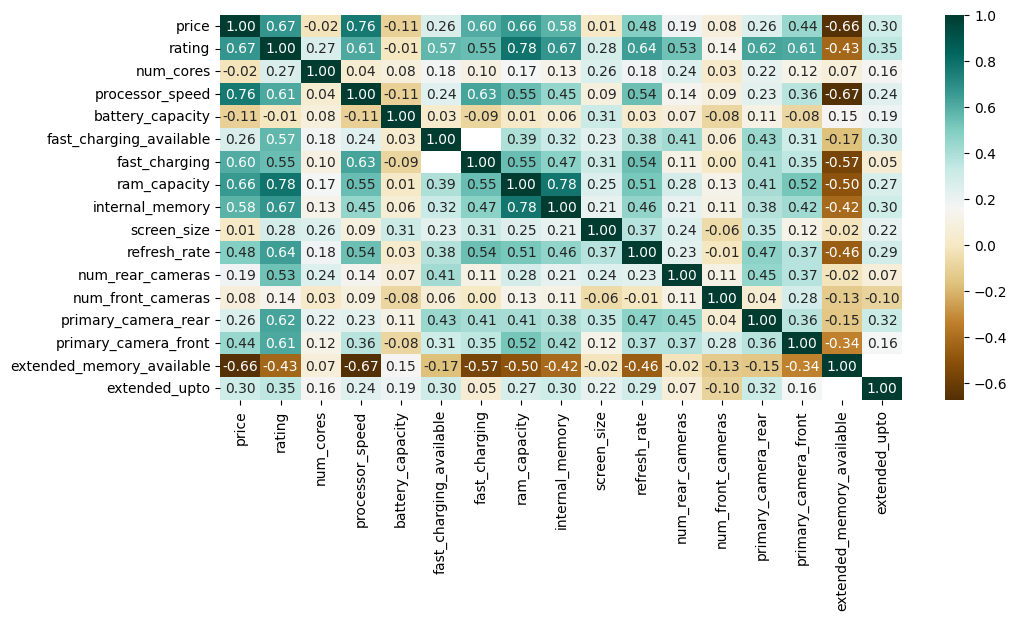

In [38]:
numeric_df = df.select_dtypes(include='number')
c = numeric_df.corr()
plt.figure(figsize=(11, 5))
sns.heatmap(c, cmap="BrBG", annot=True, fmt=".2f")

In [39]:
missing_value = df[["price", "ram_capacity", "processor_speed", "screen_size", "has_5g", "has_nfc", "refresh_rate", "rating"]].isnull().sum()
missing_value

price               0
ram_capacity        0
processor_speed    22
screen_size         0
has_5g              0
has_nfc             0
refresh_rate        0
rating              0
dtype: int64

In [40]:
df["processor_speed"] = df["processor_speed"].fillna(df["processor_speed"].median())

In [41]:
df = df[["price", "ram_capacity", "processor_speed", "screen_size", "refresh_rate", "has_5g", "has_nfc", "rating"]]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 0:7].values
Y = df.iloc[:, 7].values

ssx, ssy = StandardScaler(), StandardScaler()

Xs = ssx.fit_transform(X)
Ys = ssy.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys.ravel(), test_size=300, random_state=1000)

svr = SVR(kernel='rbf', gamma=0.75, C=2.8, cache_size=500, epsilon=0.1)

svr.fit(X_train, Y_train)
Y_pred = svr.predict(Xs)

print(svr)

SVR(C=2.8, cache_size=500, gamma=0.75)


In [43]:
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))

0.9370072994859755
0.7835280579520594


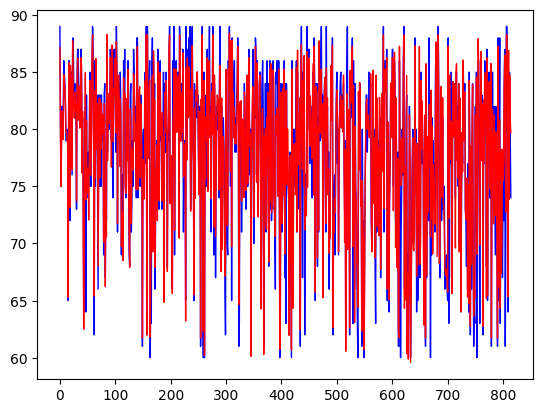

In [44]:
plt.plot(ssy.inverse_transform(Ys), color="blue", linewidth=1)
plt.plot(ssy.inverse_transform(Y_pred.reshape(-1,1)), color="red", linewidth=1)

#plt.plot(Ys, color="blue", linewidth=1)
#plt.plot(Y_pred.reshape(-1,1), color="red", linewidth=1)

plt.show()

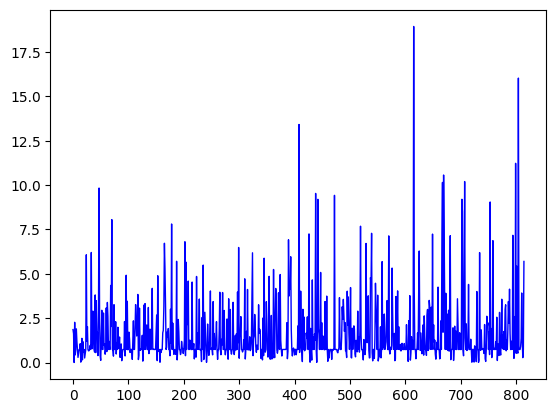

In [45]:
plt.plot(abs(ssy.inverse_transform(Ys)-ssy.inverse_transform(Y_pred.reshape(-1,1))), color="blue", linewidth=1)

plt.show()

In [46]:
X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

ssx, ssy = StandardScaler(), StandardScaler()

Xs = ssx.fit_transform(X)
Ys = ssy.fit_transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Ys.ravel(), test_size=300, random_state=1000)

svr = SVR(kernel='rbf', gamma=0.75, C=2.8, cache_size=500, epsilon=0.1)

svr.fit(X_train, Y_train)
Y_pred = svr.predict(Xs)

print(svr)

SVR(C=2.8, cache_size=500, gamma=0.75)


In [47]:
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))



0.942607784748816
0.6468560489395734


In [48]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_SVR(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

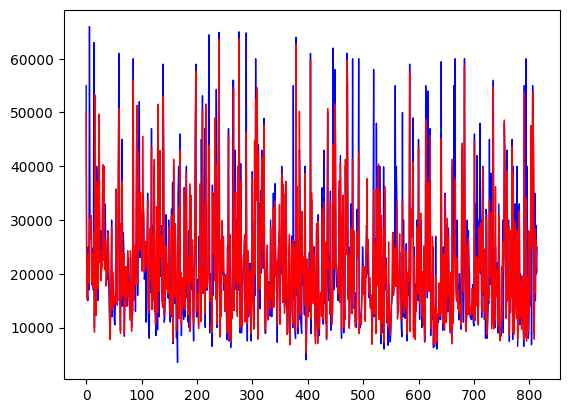

In [50]:
plt.plot(ssy.inverse_transform(Ys), color="blue", linewidth=1)
plt.plot(ssy.inverse_transform(Y_pred.reshape(-1,1)), color="red", linewidth=1)

#plt.plot(Ys, color="blue", linewidth=1)
#plt.plot(Y_pred.reshape(-1,1), color="red", linewidth=1)

plt.show()

ValueError: X has 2 features, but SVR is expecting 7 features as input.

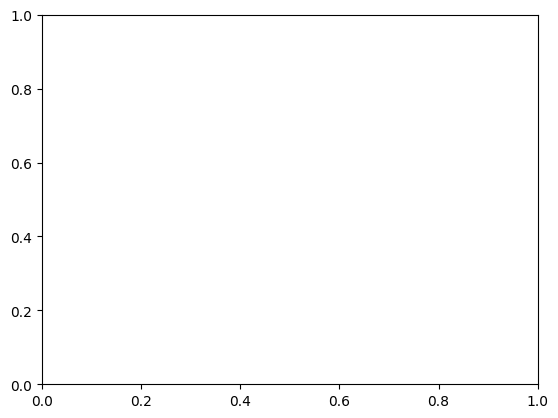

In [51]:
plot_SVR(svr)

## Redes Neurais

In [22]:
df = pd.read_csv("smartphone_cleaned_v5.csv")

<Axes: xlabel='price'>

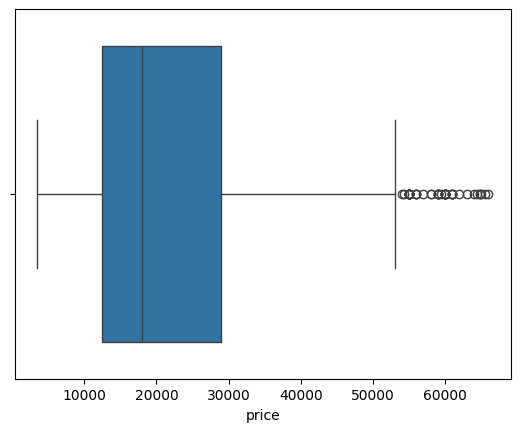

In [23]:
df = removeOutlier(df, 'price')

sns.boxplot(x=df['price'])

In [24]:
df.dropna(subset=['rating'], inplace=True)

In [25]:
df["processor_speed"] = df["processor_speed"].fillna(df["processor_speed"].median())

In [26]:
df = df[["price", "ram_capacity", "processor_speed", "screen_size", "refresh_rate", "has_5g", "has_nfc", "rating"]]

In [27]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:8].values
Y = df.iloc[:, 0].values

X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

width = height = X_train.shape[1]

#X_train = X_train.reshape((X_train.shape[0], width * height)).astype(np.float32) / 255.0
#X_test = X_test.reshape((X_test.shape[0], width * height)).astype(np.float32) / 255.0

#Y_train = to_categorical(Y_train, num_classes=8)
#Y_test = to_categorical(Y_test, num_classes=8)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import legacy

model = Sequential()

model.add(Dense(2048, input_shape=(7, )))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(optimizer=legacy.Adam(learning_rate=0.001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_test, Y_test))

Epoch 1/50


ValueError: in user code:

    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\paulo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 979
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            815 non-null    int64  
 1   ram_capacity     815 non-null    float64
 2   processor_speed  815 non-null    float64
 3   screen_size      815 non-null    float64
 4   refresh_rate     815 non-null    int64  
 5   has_5g           815 non-null    bool   
 6   has_nfc          815 non-null    bool   
 7   rating           815 non-null    float64
dtypes: bool(2), float64(4), int64(2)
memory usage: 46.2 KB


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
model = Sequential()

model.add(Dense(64, input_dim=2))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, Y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).